# Title

## Introduction

## Preliminary Results

In [2]:
library(tidyverse)
library(tidymodels)
set.seed(12345)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Rows: 32560 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): State-gov, Bachelors, Never-married, Adm-clerical, Not-in-family, W...
dbl (6): 39, 77516, 13, 2174, 0, 40

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sex,Income
<chr>,<chr>
Male,<=50K
Male,<=50K
Male,<=50K
Female,<=50K
Male,>50K
Female,>50K


[1] "Figure 1: Tidied data"


Income,Female,Male
<chr>,<int>,<int>
<=50K,8610,13388
>50K,1072,6099


[1] "Figure 2: Counts of each class"


stat
<dbl>
0.202257


[1] "Figure 4: Observed difference in proportions"


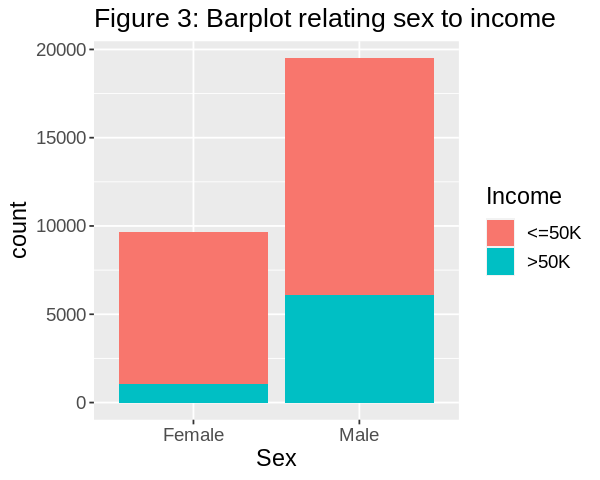

In [3]:
# Read and filter the data set
adult_data <- read_csv("https://raw.githubusercontent.com/janapc03/stat-201-project/main/adult.data")
colnames(adult_data) <- c("Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital-Status", 
                          "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss", 
                          "Hours-per-Week", "Native_Country", "Income")

adult_data <- adult_data %>%
    filter(Native_Country == "United-States") %>%
    select(Sex, Income)
head(adult_data)
print("Figure 1: Tidied data")

adult_data %>% 
    group_by(Sex, Income) %>% 
    tally() %>%
    spread(Sex, n)
print("Figure 2: Counts of each class")

# Plot the data
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(adult_data, aes(x = Sex, fill = Income)) +
    geom_bar() +
    labs(x = "Sex", title = "Figure 3: Barplot relating sex to income") +
    theme(text = element_text(size = 14), plot.title = element_text(size=16)) 

# Compute estimate
obs_diff_prop <- adult_data %>%
    specify(formula = Income ~ Sex, success = ">50K") %>%
    calculate(stat = "diff in props", order = c("Male", "Female"))
obs_diff_prop
print("Figure 4: Observed difference in proportions")

## Method: Plan

## References